<a href="https://colab.research.google.com/github/FazleRabbbiferdaus172/Classifiers/blob/master/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

#Mount Drive

In [ ]:
drive.mount('/content/gdrive')
fruit_data_url = '/content/gdrive/My Drive/Data_set/fruit_data_with_colors.txt'
bank_note_url = '/content/gdrive/My Drive/Data_set/data_banknote_authentication.txt'
zoo_url = '/content/gdrive/My Drive/Data_set/zoo.data'
abalone_url = '/content/gdrive/My Drive/Data_set/abalone.data'
seed_url = '/content/gdrive/My Drive/Data_set/seeds_dataset.txt'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


#Loading Data


In [ ]:
b_columns = ['variance','skewness','curtosis', 'entropy','class']
z_columns = ['name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']
a_columns = ['Sex' ,'Length' ,'Diameter' ,'Height' ,'Whole weight' ,'Shucked weight' ,'Viscera weight' ,'Shell weight' ,'Rings']
#s_columns = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'length', 'type']
fruits = pd.read_table(fruit_data_url)
banks = pd.read_csv(bank_note_url,names=b_columns)
zoo = pd.read_csv(zoo_url,names=z_columns)
abalone = pd.read_csv(abalone_url,names=a_columns)
seed = pd.read_csv(seed_url,sep='\t',error_bad_lines=False)
#zoo.head()
#seed = pd.read_csv(seed_url)
#seed.head()
abalone.head()

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#Adding the missing feature names

In [ ]:
#banks.columns = ['variance','skewness','curtosis', 'entropy','class']
#zoo.columns = ['name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']
#abalone.columns = ['Sex' ,'Length' ,'Diameter' ,'Height' ,'Whole weight' ,'Shucked weight' ,'Viscera weight' ,'Shell weight' ,'Rings']
seed.columns = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'length', 'type']
#banks.head()
banks_c = banks.columns[:-1]
banks_l = banks.columns[-1]

zoo_c = zoo.columns[1:-1]
zoo_l = zoo.columns[-1]

abalone_c = abalone.columns[:-1]
abalone_l = abalone.columns[-1]

seed_c = seed.columns[:-1]
seed_l = seed.columns[-1]

#Categorical Variables to numerical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
abalone['Sex'] = number.fit_transform(abalone['Sex'].astype('str'))
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#Creating a mapping from label value to class name

In [ ]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

#Spliting training and test data

In [ ]:
fruits_X = fruits[['height', 'width', 'mass', 'color_score']]
fruits_y = fruits['fruit_label']
fruits_X_train, fruits_X_test, fruits_y_train, fruits_y_test = train_test_split(fruits_X, fruits_y, random_state=0)


banks_X = banks[banks_c]
banks_y = banks[banks_l]
banks_X_train, banks_X_test, banks_y_train, banks_y_test = train_test_split(banks_X, banks_y, random_state=0)

zoo_X = zoo[zoo_c]
zoo_y = zoo[zoo_l]
zoo_X_train, zoo_X_test, zoo_y_train, zoo_y_test = train_test_split(zoo_X, zoo_y, random_state=0)

abalone_X = abalone[abalone_c]
abalone_y = abalone[abalone_l]
abalone_X_train, abalone_X_test, abalone_y_train, abalone_y_test = train_test_split(abalone_X, abalone_y, random_state = 0)

seed_X = seed[seed_c]
seed_y = seed[seed_l]
seed_X_train, seed_X_test, seed_y_train, seed_y_test = train_test_split(seed_X,seed_y, random_state=0)


data_set = [[fruits_X_train, fruits_X_test, fruits_y_train, fruits_y_test],[banks_X_train, banks_X_test, banks_y_train, banks_y_test],[zoo_X_train, zoo_X_test, zoo_y_train, zoo_y_test],[abalone_X_train, abalone_X_test, abalone_y_train, abalone_y_test],[seed_X_train, seed_X_test, seed_y_train, seed_y_test]]

#2D DATA visualization

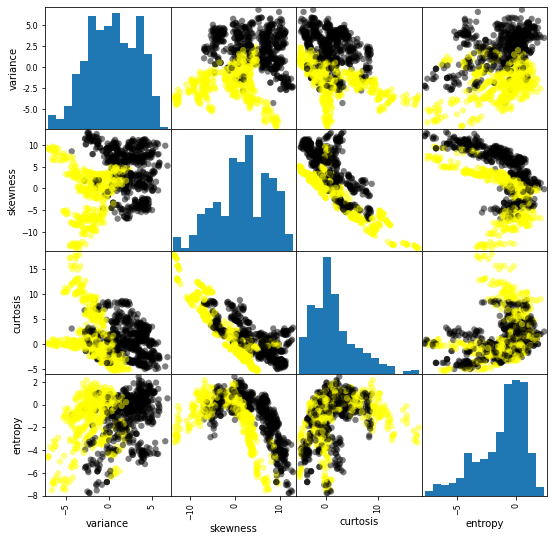

In [ ]:
from matplotlib import cm
from pandas.plotting import scatter_matrix
cmap = cm.get_cmap('gnuplot')
#scatter = scatter_matrix(fruits_X_train, c = fruits_y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9),cmap=cmap)
scatter = scatter_matrix(banks_X_train, c = banks_y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9),cmap=cmap)

#3D DATA VISUALIZATION

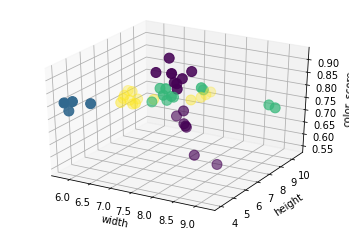

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(fruits_X_train['width'], fruits_X_train['height'], fruits_X_train['color_score'], c = fruits_y_train,marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

#Create classifier object

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

'''f_knn = KNeighborsClassifier(n_neighbors=3)
b_knn = KNeighborsClassifier(n_neighbors=3)
z_knn = KNeighborsClassifier(n_neighbors=3)
a_knn = KNeighborsClassifier(n_neighbors=12)
s_knn = KNeighborsClassifier(n_neighbors=5)

f_lr = LogisticRegression(multi_class='multinomial', solver = 'newton-cg')
b_lr = LogisticRegression()
z_lr = LogisticRegression(multi_class='multinomial', solver = 'newton-cg')
a_lr = LogisticRegression(multi_class='multinomial', solver = 'newton-cg')
s_lr = LogisticRegression(multi_class='multinomial', solver = 'newton-cg')

f_svc = SVC(kernel = 'linear', C = 1)
b_svc = SVC(kernel = 'linear', C = 1)
z_svc = SVC(kernel = 'linear', C = 1)
a_svc = SVC(kernel = 'linear', C = 1)
s_svc = SVC(kernel = 'linear', C = 1)

f_dtc = DecisionTreeClassifier(max_depth = 2)
b_dtc = DecisionTreeClassifier(max_depth = 2)
z_dtc = DecisionTreeClassifier(max_depth = 2)
a_dtc = DecisionTreeClassifier(max_depth = 2)
s_dtc = DecisionTreeClassifier(max_depth = 2)

f_rtc = RandomForestClassifier(n_estimators=100)
b_rtc = RandomForestClassifier(n_estimators=100)
z_rtc = RandomForestClassifier(n_estimators=100)
a_rtc = RandomForestClassifier(n_estimators=100)
s_rtc = RandomForestClassifier(n_estimators=100)'''


knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(multi_class='multinomial', solver = 'newton-cg')
svc = SVC(kernel = 'linear', C = 1)
dtc = DecisionTreeClassifier(max_depth = 2)
rtc = RandomForestClassifier(n_estimators=100)

classifier = [knn,lr,svc,dtc,rtc]

#Training the classifier

1.KNN

In [ ]:
#f_knn.fit(fruits_X_train,fruits_y_train)

In [ ]:
#b_knn.fit(banks_X_train,banks_y_train)

In [ ]:
#z_knn.fit(zoo_X_train,zoo_y_train)

In [ ]:
#a_knn.fit(abalone_X_train,abalone_y_train)

In [ ]:
#s_knn.fit(seed_X_train,seed_y_train)

2.Logistic Regression

In [ ]:
#f_lr.fit(fruits_X_train, fruits_y_train)

In [ ]:
#b_lr.fit(banks_X_train, banks_y_train)

In [ ]:
#z_lr.fit(zoo_X_train, zoo_y_train)

In [ ]:
#a_lr.fit(abalone_X_train,abalone_y_train)

In [ ]:
#s_lr.fit(seed_X_tarin,seed_y_train)

3.Support Vector Machine

In [ ]:
#f_svc.fit(fruits_X_train, fruits_y_train)

In [ ]:
#b_svc.fit(banks_X_train, banks_y_train)

In [ ]:
#z_svc.fit(zoo_X_train, zoo_y_train)

In [ ]:
#a_svc.fit(abalone_X_train,abalone_y_train)

In [ ]:
#s_svc.fit(seed_X_train,seed_y_train)

4.Decision Tree

In [ ]:
'''f_dtc.fit(fruits_X_train,fruits_y_train)
b_dtc.fit(banks_X_train,banks_y_train)
z_dtc.fit(zoo_X_train,zoo_y_train)
a_dtc.fit(abalone_X_train,abalone_y_train)
s_dtc.fit(seed_X_tarin,seed_y_train)'''

'f_dtc.fit(fruits_X_train,fruits_y_train)\nb_dtc.fit(banks_X_train,banks_y_train)\nz_dtc.fit(zoo_X_train,zoo_y_train)\na_dtc.fit(abalone_X_train,abalone_y_train)\ns_dtc.fit(seed_X_tarin,seed_y_train)'

5.Random Forest 

In [ ]:
'''f_rtc.fit(fruits_X_train,fruits_y_train)
b_rtc.fit(banks_X_train,banks_y_train)
z_rtc.fit(zoo_X_train,zoo_y_train)
a_rtc.fit(abalone_X_train,abalone_y_train)
s_rtc.fit(seed_X_tarin,seed_y_train)'''

'f_rtc.fit(fruits_X_train,fruits_y_train)\nb_rtc.fit(banks_X_train,banks_y_train)\nz_rtc.fit(zoo_X_train,zoo_y_train)\na_rtc.fit(abalone_X_train,abalone_y_train)\ns_rtc.fit(seed_X_tarin,seed_y_train)'

#Accuracy of classifier using test set

In [ ]:
#f_knn.score(fruits_X_test,fruits_y_test)

In [ ]:
#f_lr.score(fruits_X_test, fruits_y_test)

In [ ]:
#f_svc.score(fruits_X_test, fruits_y_test)

In [ ]:
#f_dtc.score(fruits_X_test, fruits_y_test)

In [ ]:
#f_rtc.score(fruits_X_test, fruits_y_test)

In [ ]:
#b_knn.score(banks_X_test,banks_y_test)

In [ ]:
#b_lr.score(banks_X_test,banks_y_test)

In [ ]:
#b_svc.score(banks_X_test,banks_y_test)

In [ ]:
#b_dtc.score(banks_X_test,banks_y_test)

In [ ]:
#z_knn.score(zoo_X_test,zoo_y_test)

In [ ]:
#z_lr.score(zoo_X_test,zoo_y_test)

In [ ]:
#z_svc.score(zoo_X_test,zoo_y_test)

In [ ]:
#z_dtc.score(zoo_X_test,zoo_y_test)

In [ ]:
#a_knn.score(abalone_X_test,abalone_y_test)

In [ ]:
#a_lr.score(abalone_X_test,abalone_y_test)

In [ ]:
#a_svc.score(abalone_X_test,abalone_y_test)

In [ ]:
#a_dtc.score(abalone_X_test,abalone_y_test)

In [ ]:
#s_knn.score(seed_X_test,seed_y_test)

In [ ]:
#s_lr.score(seed_X_test,seed_y_test)

In [ ]:
#s_svc.score(seed_X_test,seed_y_test)

In [ ]:
#s_dtc.score(seed_X_test,seed_y_test)

#Evaluation matrix

In [ ]:
from sklearn import metrics
d_name = ["FRUIT DATA SET","BANK DATA SET","ZOO DATA SET","ABALONE DATA SET","SEED DATA SET"]
c_name = ['KNN  ','LRC  ','SVM  ','DTC  ','RFC  ']

with open("TASK_2.txt","w") as ouf:
    for d,i in zip(d_name,data_set):
        print(d)
        ouf.write(d+"\n")
        print("Name   accu    prec   reca  f1_sc  ")
        ouf.write("Name   accu    prec   reca  f1_sc  "+"\n")
        for n,j in zip(c_name,classifier):
            #s1=i[0].shapecut
            #s2=i[1].shapecut
            #print(s1,s2)cut
            j.fit(i[0],i[2])
            y_pred = j.predict(i[1])
            acc = metrics.accuracy_score(i[3],y_pred)
            pre = metrics.precision_score(i[3],y_pred,average = 'macro', zero_division=1)
            rec = metrics.recall_score(i[3],y_pred, average = 'macro',zero_division=1)
            f1 = metrics.f1_score(i[3],y_pred, average = 'macro', zero_division=1)
            print(n,end=' ')
            ouf.write(str(n)+" ")
            print('%.4f'%acc, '%.4f'%pre, '%.4f'%rec, '%.4f'%f1)
            ouf.write(str('%.4f'%acc)+" " +str('%.4f'%pre)+" "+ str('%.4f'%rec)+" " + str('%.4f'%f1)+"\n")
            #print(pre)cut
        print("---------------")
        ouf.write("---------------"+"\n")


FRUIT DATA SET
Name   accu    prec   reca  f1_sc  
KNN   0.5333 0.6250 0.6562 0.6083
LRC   0.4667 0.6875 0.6875 0.6667
SVM   0.6000 0.8500 0.8125 0.7429
DTC   0.6667 0.7841 0.5312 0.5175
RFC   0.8667 0.8750 0.9375 0.8810
---------------
BANK DATA SET
Name   accu    prec   reca  f1_sc  
KNN   1.0000 1.0000 1.0000 1.0000
LRC   0.9854 0.9837 0.9872 0.9852
SVM   0.9854 0.9837 0.9872 0.9852
DTC   0.9155 0.9164 0.9110 0.9133
RFC   0.9913 0.9907 0.9915 0.9911
---------------
ZOO DATA SET
Name   accu    prec   reca  f1_sc  
KNN   1.0000 1.0000 1.0000 1.0000
LRC   1.0000 1.0000 1.0000 1.0000
SVM   1.0000 1.0000 1.0000 1.0000
DTC   0.7692 0.9221 0.4286 0.3750
RFC   1.0000 1.0000 1.0000 1.0000
---------------
ABALONE DATA SET
Name   accu    prec   reca  f1_sc  
KNN   0.2115 0.4237 0.1120 0.1037
LRC   0.2469 0.7278 0.0899 0.0752
SVM   0.2660 0.8071 0.1016 0.0799
DTC   0.2488 0.8762 0.1061 0.0675
RFC   0.2421 0.3711 0.1636 0.1173
---------------
SEED DATA SET
Name   accu    prec   reca  f1_sc  
KNN

In [ ]:
from sklearn import metrics
d_name = ["FRUIT DATA SET","BANK DATA SET","ZOO DATA SET","ABALONE DATA SET","SEED DATA SET"]
c_name = ['KNN  ','LRC  ','SVM  ','DTC  ','RFC  ']

with open("TASK_4_train.txt","w") as ouf:
    for d,i in zip(d_name,data_set):
        print(d)
        ouf.write(d+"\n")
        print("Name   accu    prec   reca  f1_sc  ")
        ouf.write("Name   accu    prec   reca  f1_sc  "+"\n")
        for n,j in zip(c_name,classifier):
            #s1=i[0].shapecut
            #s2=i[1].shapecut
            #print(s1,s2)cut
            j.fit(i[0],i[2])
            y_pred = j.predict(i[0])
            acc = metrics.accuracy_score(i[2],y_pred)
            pre = metrics.precision_score(i[2],y_pred,average = 'macro', zero_division=1)
            rec = metrics.recall_score(i[2],y_pred,average = 'macro', zero_division=1)
            f1 = metrics.f1_score(i[2],y_pred,average = 'macro', zero_division=1)
            print(n,end=' ')
            ouf.write(str(n)+" ")
            print('%.4f'%acc, '%.4f'%pre, '%.4f'%rec, '%.4f'%f1)
            ouf.write(str('%.4f'%acc)+" " +str('%.4f'%pre)+" "+ str('%.4f'%rec)+" " + str('%.4f'%f1)+"\n")
            #print(pre)cut
        print("---------------")
        ouf.write("---------------"+"\n")


FRUIT DATA SET
Name   accu    prec   reca  f1_sc  
KNN   0.8182 0.8602 0.8510 0.8536
LRC   0.8182 0.8667 0.8242 0.8194
SVM   0.8182 0.8667 0.8242 0.8194
DTC   0.7955 0.8875 0.6643 0.6304
RFC   1.0000 1.0000 1.0000 1.0000
---------------
BANK DATA SET
Name   accu    prec   reca  f1_sc  
KNN   0.9990 0.9989 0.9991 0.9990
LRC   0.9932 0.9929 0.9934 0.9931
SVM   0.9913 0.9911 0.9913 0.9912
DTC   0.9155 0.9157 0.9133 0.9143
RFC   1.0000 1.0000 1.0000 1.0000
---------------
ZOO DATA SET
Name   accu    prec   reca  f1_sc  
KNN   0.9467 0.9153 0.8750 0.8575
LRC   1.0000 1.0000 1.0000 1.0000
SVM   1.0000 1.0000 1.0000 1.0000
DTC   0.7200 0.8966 0.4286 0.3475
RFC   1.0000 1.0000 1.0000 1.0000
---------------
ABALONE DATA SET
Name   accu    prec   reca  f1_sc  
KNN   0.5089 0.7297 0.3504 0.3510
LRC   0.2698 0.7648 0.0790 0.0683
SVM   0.2625 0.8498 0.0854 0.0731
DTC   0.2551 0.8930 0.0919 0.0563
RFC   1.0000 1.0000 1.0000 1.0000
---------------
SEED DATA SET
Name   accu    prec   reca  f1_sc  
KNN

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

def do(abalone_X_train, abalone_y_train,model):
    cv = StratifiedKFold(n_splits=2, shuffle=False)

    #ada_model = AdaBoostClassifier(n_estimators=100, random_state=0)

    acc_train = []
    recall_train = []
    auROC_train = []

    acc_test = []
    recall_test = []
    auROC_test = []


    for train_index, test_index in cv.split(abalone_X_train, abalone_y_train):
        X_train = abalone_X_train[train_index]
        X_test = abalone_X_train[test_index]
        y_train = abalone_y_train[train_index]
        y_test = abalone_y_train[test_index]
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        acc_test.append(metrics.accuracy_score(y_test, y_pred_test))
        recall_test.append(metrics.recall_score(y_test, y_pred_test, average='macro'))
        #auROC_test.append(metrics.roc_auc_score(y_test, y_pred_test, average='macro',multi_class='ovr'))

        acc_train.append(metrics.accuracy_score(y_train, y_pred_train))
        recall_train.append(metrics.recall_score(y_train, y_pred_train,average='macro'))
        #auROC_train.append(metrics.roc_auc_score(y_train, y_pred_train, average='macro',multi_class='ovr'))

    print("Test ACCURACY: {0:3.6}%".format(np.mean(acc_test)*100), "Train ACCURACY: {0:3.6}%".format(np.mean(acc_train)*100))
    print("Test Recall: {0:3.6}%".format(np.mean(recall_test)*100), "Train Recall: {0:3.6}%".format(np.mean(recall_train)*100))

ada_model = AdaBoostClassifier(n_estimators=100, random_state=0)
DT = DecisionTreeClassifier()
GB = GaussianNB()
LR = LogisticRegression(max_iter=1000)
vt_model = VotingClassifier(estimators=[('dt', DT), ('lr', LR), ('gb', GB)], weights=[1,1,1])

seed_X_train = np.asarray(seed_X_train)
seed_y_train = np.asarray(seed_y_train)

abalone_X_train = np.asarray(abalone_X_train)
abalone_y_train = np.asarray(abalone_y_train)

print('abalone_adaboost')
do(abalone_X_train, abalone_y_train,ada_model)
print('seed_adaboost')
do(seed_X_train, seed_y_train, ada_model)
print('abalone_ensemble')
do(abalone_X_train, abalone_y_train,vt_model)
print('seed_ensemble')
do(seed_X_train, seed_y_train, vt_model)

abalone_adaboost


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


Test ACCURACY: 21.0728% Train ACCURACY: 21.9987%
Test Recall: 6.7203% Train Recall: 10.9659%
seed_adaboost
Test ACCURACY: 88.5135% Train ACCURACY: 97.973%
Test Recall: 88.4054% Train Recall: 97.9167%
abalone_ensemble


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


Test ACCURACY: 23.8825% Train ACCURACY: 46.871%
Test Recall: 12.3167% Train Recall: 41.7793%
seed_ensemble
Test ACCURACY: 90.5405% Train ACCURACY: 99.3243%
Test Recall: 90.2986% Train Recall: 99.3056%


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Optimaization of k in knn classifier & Decision tree

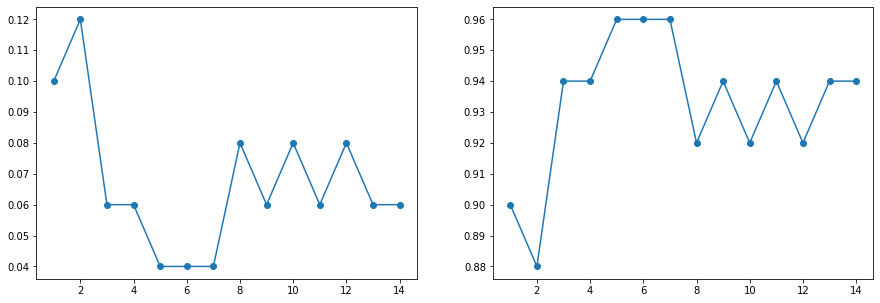

In [ ]:
rng = int(seed_X.shape[0]**0.5)+1

figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))

error_rate = []
accu_l = []

for i in range(1,rng):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(seed_X_train, seed_y_train)
    pred = knn.predict(seed_X_test)
    error_rate.append(np.mean(pred != seed_y_test))
    accu_l.append(metrics.accuracy_score(seed_y_test,pred))


axes[0].plot(range(1,rng),error_rate, marker='o')
axes[1].plot(range(1,rng),accu_l, marker='o')
plt.show()